# LAB: Comparando diferentes métodos de clustering para el dataset "Breast Cancer"

## Introducción

Vamos a trabajar con el dataset de cáncer de pecho elaborado por la Universidad de Wisconsin (que ya habíamos usado previamente). Las features fueron calculadas de imágenes digitalizadas de tejido mamario. Describen características de los núcleos celulares en las imágenes.

El LAB tiene tres objetivos:

- que puedan estimar y evaluar un clustering jerárquico
- que puedan estimar y evaluar un clustering generado mediante DBSCAN (probando diferentes valores de `eps` y `min_samples` para DBSCAN)

### Ejercicio

### Requerimientos

1. Realizar clusterings jerárquicos y determinar el número de clusters en función del dendrograma (usando `SciPy`)
2. Realizar clustering mediante DBSCAN y probar con diversos valores de los parámetros `eps` y `min_samples` para entender su efecto
3. ¿Qué pueden decir respecto al funcionamiento de ambos métodos en este dataset?

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet,fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()
X, y = df.data, df.target

In [3]:
print(df.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [4]:
X_std = StandardScaler().fit_transform(X)

### 1. Clustering Jerárquico - método de linkage: ward

In [5]:
Z = linkage(X_std, 'ward')

#### ¿Cómo evaluán el resultado del proceso?

In [6]:
c, coph_dists = cophenet(Z, pdist(X_std))
c

0.58618771506488121

#### Exámen del dendrograma

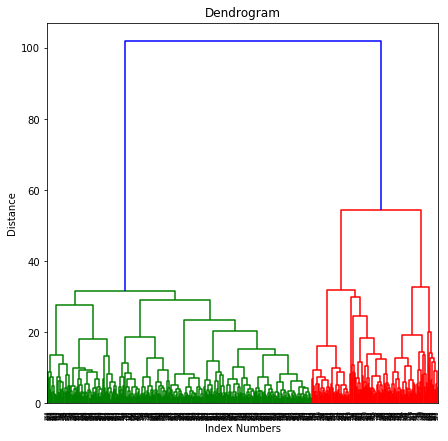

In [7]:
plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=5.,
)
plt.show()

#### Generación de los clusters en función del punto de corte en el dendrograma

In [8]:
max_dist = 35
clusters = fcluster(Z, max_dist, criterion='distance')

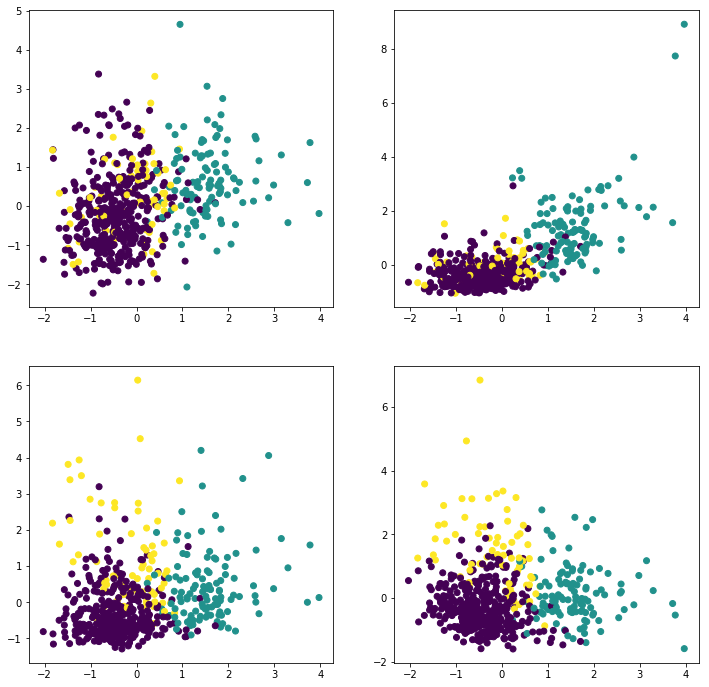

In [9]:
plt.figure(figsize=(12, 12))

ax1=plt.subplot(221)
ax1.scatter(X_std[:,0], X_std[:,1], c=clusters)

ax1=plt.subplot(222)
ax1.scatter(X_std[:, 0], X_std[:, 10], c=clusters)

ax1=plt.subplot(223)
ax1.scatter(X_std[:, 0], X_std[:, 15], c=clusters)

ax1=plt.subplot(224)
ax1.scatter(X_std[:, 0], X_std[:, 29], c=clusters)

### 3. DBSCAN

Probemos, ahora, con un análisis de DBSCAN.

In [10]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

#### Instanciamos el modelo y seteamos un valor inicial de los parámetros en eps alrededor de 2.05 y min_samples = 5.

In [11]:
dbscn = DBSCAN(eps = 2.05, min_samples = 5, metric='euclidean').fit(X_std)
core_samples_mask = np.zeros_like(dbscn.labels_, dtype=bool)
core_samples_mask[dbscn.core_sample_indices_] = True
labels = dbscn.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

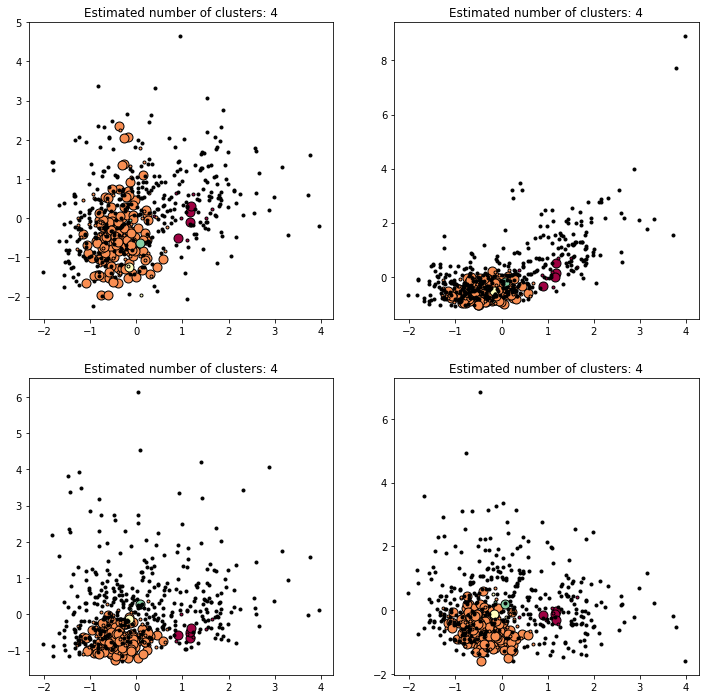

In [12]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=[12,12])
ax1=plt.subplot(221)
for k, col in zip(unique_labels, colors):
    if k == -1:         
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X_std[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=9)

    xy = X_std[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_)

ax1=plt.subplot(222)
for k, col in zip(unique_labels, colors):
    if k == -1:         
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X_std[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 10], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=9)

    xy = X_std[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 10], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_)


ax1=plt.subplot(223)
for k, col in zip(unique_labels, colors):
    if k == -1:         
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X_std[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 15], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=9)

    xy = X_std[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 15], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_)


ax1=plt.subplot(224)
for k, col in zip(unique_labels, colors):
    if k == -1:         
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X_std[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 29], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=9)

    xy = X_std[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 29], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_)

#### Alteremos los valores de los dos parámetros principales y veamos como funciona...

In [13]:
# Probar con valores de eps #2.00, 2.05; 2.06; 2.07; 2.1 a 2.9;